## 数据分析和可视化

    在wrangle_act.ipynb中，我们已经处理了tweet_json.txt和twitter-archive-enhanced.csv的数据，且生成到twitter_archive_master.csv文件中。

In [8]:
# -*- coding=utf-8 -*-
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# 读取twitter_archive_master.csv
twitter_archive_master = pd.read_csv("twitter_archive_master.csv")
twitter_archive_master.info()
twitter_archive_master.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 14 columns):
tweet_id              1438 non-null int64
name                  1438 non-null object
rating_numerator      1438 non-null int64
rating_denominator    1438 non-null int64
timestamp             1438 non-null object
text                  1438 non-null object
source_text           1438 non-null object
expanded_urls_one     1398 non-null object
doggo                 1438 non-null object
floofer               1438 non-null object
pupper                1438 non-null object
puppo                 1438 non-null object
retweet_count         890 non-null float64
favorite_count        890 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 157.4+ KB


,tweet_id,name,rating_numerator,rating_denominator,timestamp,text,source_text,expanded_urls_one,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,Phineas,13,10,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Twitter for iPhone,https://twitter.com/dog_rates/status/892420643...,None,None,None,None,NaN,NaN
1,892177421306343426,Tilly,13,10,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Twitter for iPhone,https://twitter.com/dog_rates/status/892177421...,None,None,None,None,NaN,NaN
2,891815181378084864,Archie,12,10,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Twitter for iPhone,https://twitter.com/dog_rates/status/891815181...,None,None,None,None,4301.0,25445.0


In [9]:
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1.438000e+03,1438.000000,1438.0,890.000000,890.000000
mean,7.706092e+17,14.479833,10.0,4020.047191,10822.894382
std,6.864808e+16,52.108159,0.0,5617.016301,13021.128657
min,6.661022e+17,11.000000,10.0,2.000000,0.000000
25%,7.031264e+17,11.000000,10.0,1028.500000,2381.000000
50%,7.774056e+17,12.000000,10.0,2304.000000,6398.500000
75%,8.283699e+17,13.000000,10.0,4899.500000,14694.500000
max,8.924206e+17,1776.000000,10.0,56373.000000,106634.000000


#### 通过上面的describe()可以得知，retweet_count的最大值是56373，favorite_count的最大值是106634，平均分值约为14.48。它们是哪些小狗的推文产生的呢？

In [46]:
twitter_archive_master[twitter_archive_master.retweet_count==56373]

,tweet_id,name,rating_numerator,rating_denominator,timestamp,text,source_text,expanded_urls_one,doggo,floofer,pupper,puppo,retweet_count,favorite_count
254,842892208864923648,Stephan,13,10,2017-03-18 00:15:37,RT @dog_rates: This is Stephan. He just wants ...,Twitter for iPhone,https://twitter.com/dog_rates/status/807106840...,None,None,None,None,56373.0,0.0
508,807106840509214720,Stephan,13,10,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,Twitter for iPhone,https://twitter.com/dog_rates/status/807106840...,None,None,None,None,56373.0,106634.0


In [11]:
twitter_archive_master[twitter_archive_master.favorite_count==106634]

,tweet_id,name,rating_numerator,rating_denominator,timestamp,text,source_text,expanded_urls_one,doggo,floofer,pupper,puppo,retweet_count,favorite_count
508,807106840509214720,Stephan,13,10,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,Twitter for iPhone,https://twitter.com/dog_rates/status/807106840...,None,None,None,None,56373.0,106634.0


可以推测这个创造最大的转发量、收藏量的小狗Stephan，很可能是同一条小狗，可以通过expanded_urls_one确认下。

#### 这些推文，通过什么渠道发出的？我们通过source_text来分析下：

In [26]:
twitter_archive_master.source_text.value_counts()

Twitter for iPhone     1342
Vine - Make a Scene      71
Twitter Web Client       17
TweetDeck                 8
Name: source_text, dtype: int64

([<matplotlib.patches.Wedge at 0xb7be860>,
  <matplotlib.text.Text at 0xb069630>])

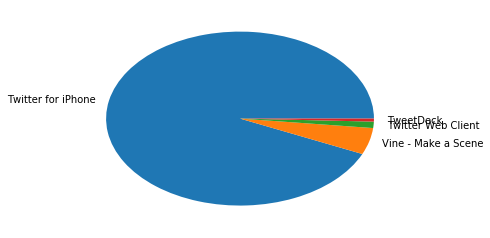

In [28]:
# 画图
plt.pie(by_source, labels=['Twitter for iPhone', 'Vine - Make a Scene', 'Twitter Web Client', 'TweetDeck'])

可以得知Twitter for iPhone渠道的推特数据是最多的。

#### 小狗的历史最高分值排名是怎么样的？（这里用name值来区别小狗）

In [42]:
# 按照name分组后，求 rating_numerator 的最大值
names = twitter_archive_master.groupby(['name'])['rating_numerator'].max()
names['None']=0
names.sort_values(ascending=False)[:9]

name
Atticus    1776
Logan        75
Sophie       27
Smiley       14
a            14
Kuyu         14
Cermet       14
Iggy         14
Doobert      14
Name: rating_numerator, dtype: int64

通过上面的结果得知(None没有名字的忽略)，分值排前3的狗分别是Atticus(1776/10)、Logan(75/10)、Sophie(27/10)